In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
df = pd.read_csv("data_including_distance.csv")
df.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,Year,Month,Crime
0,abbotsford,2,h,1480000.0,2.5,1.0,1.0,202.0,2016,2,1053.0
1,abbotsford,2,h,1035000.0,2.5,1.0,0.0,156.0,2016,3,1053.0
2,abbotsford,4,h,1600000.0,2.5,1.0,2.0,120.0,2016,3,1053.0
3,abbotsford,2,h,941000.0,2.5,1.0,0.0,181.0,2016,6,1053.0
4,abbotsford,3,h,1876000.0,2.5,2.0,0.0,245.0,2016,6,1053.0


In [3]:
# Dropping suburb, can drop any other x variables to try and improve R2 value
df_model = df[["Rooms","Type", "Price", "Distance", "Bathroom", "Car", "Landsize", "Year", "Month", "Crime"]]
df_model.head()

,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,Year,Month,Crime
0,2,h,1480000.0,2.5,1.0,1.0,202.0,2016,2,1053.0
1,2,h,1035000.0,2.5,1.0,0.0,156.0,2016,3,1053.0
2,4,h,1600000.0,2.5,1.0,2.0,120.0,2016,3,1053.0
3,2,h,941000.0,2.5,1.0,0.0,181.0,2016,6,1053.0
4,3,h,1876000.0,2.5,2.0,0.0,245.0,2016,6,1053.0


<function matplotlib.pyplot.show(*args, **kw)>

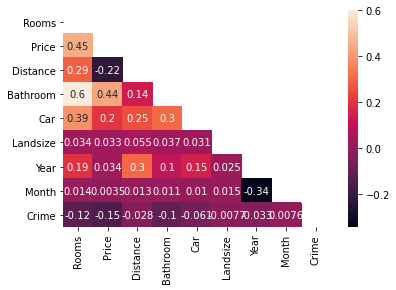

In [52]:
# Computing the correlation matrix
summed_corrMatrix = df_model.corr()

# Mask to cover the upper triangle so we only see one result for each correlation
mask = np.triu(np.ones_like(summed_corrMatrix, dtype=bool))

# Drawing the heatmap with the mask
sn.heatmap(summed_corrMatrix, mask = mask, annot = True);

# Exporting plot as PNG
# plt.savefig("Output/traits_corrMatrix")

# Display plot
plt.show

## Binary encoding


In [4]:
data = df_model.copy()
binary_encoded_df = pd.get_dummies(data, columns=["Type"])
binary_encoded_df.head()

,Rooms,Price,Distance,Bathroom,Car,Landsize,Year,Month,Crime,Type_h,Type_t,Type_u
0,2,1480000.0,2.5,1.0,1.0,202.0,2016,2,1053.0,1,0,0
1,2,1035000.0,2.5,1.0,0.0,156.0,2016,3,1053.0,1,0,0
2,4,1600000.0,2.5,1.0,2.0,120.0,2016,3,1053.0,1,0,0
3,2,941000.0,2.5,1.0,0.0,181.0,2016,6,1053.0,1,0,0
4,3,1876000.0,2.5,2.0,0.0,245.0,2016,6,1053.0,1,0,0


In [5]:
scaling_df = binary_encoded_df.copy()
scaling_df.head()

,Rooms,Price,Distance,Bathroom,Car,Landsize,Year,Month,Crime,Type_h,Type_t,Type_u
0,2,1480000.0,2.5,1.0,1.0,202.0,2016,2,1053.0,1,0,0
1,2,1035000.0,2.5,1.0,0.0,156.0,2016,3,1053.0,1,0,0
2,4,1600000.0,2.5,1.0,2.0,120.0,2016,3,1053.0,1,0,0
3,2,941000.0,2.5,1.0,0.0,181.0,2016,6,1053.0,1,0,0
4,3,1876000.0,2.5,2.0,0.0,245.0,2016,6,1053.0,1,0,0


## Checking min and max values

In [35]:
## checking min/max for all x values 
# Rooms
print(f"Rooms max: {scaling_df['Rooms'].max()}")
print(f"Rooms min: {scaling_df['Rooms'].min()}")

# distance
print(f"Dist max: {scaling_df['Distance'].max()}")
print(f"Dist min: {scaling_df['Distance'].min()}")

# bath
print(f"Bath max: {scaling_df['Bathroom'].max()}")
print(f"Bath min: {scaling_df['Bathroom'].min()}")

# car
print(f"Car max: {scaling_df['Car'].max()}")
print(f"Car min: {scaling_df['Car'].min()}")

# landsize
print(f"Land max: {scaling_df['Landsize'].max()}")
print(f"Land min: {scaling_df['Landsize'].min()}")

# year
print(f"Year max: {scaling_df['Year'].max()}")
print(f"Year min: {scaling_df['Year'].min()}")

# month
print(f"Month max: {scaling_df['Month'].max()}")
print(f"Month min: {scaling_df['Month'].min()}")

# crime
print(f"Crime max: {scaling_df['Crime'].max()}")
print(f"Crime min: {scaling_df['Crime'].min()}")

Rooms max: 12
Rooms min: 1
Dist max: 48.1
Dist min: 0.0
Bath max: 9.0
Bath min: 0.0
Car max: 18.0
Car min: 0.0
Land max: 433014.0
Land min: 0.0
Year max: 2018
Year min: 2016
Month max: 11
Month min: 0
Crime max: 15485.0
Crime min: 1.0


## Scaling

In [6]:
# scaling rooms
scaling_df['Rooms'] = (scaling_df['Rooms'] - 1)/(12-1)

#scaling distance 
scaling_df['Distance'] = (scaling_df['Distance'] - 0)/(48.1-0)

# scaling bathroom
scaling_df['Bathroom'] = (scaling_df['Bathroom'] - 0)/(9-0)

# scaling car
scaling_df['Car'] = (scaling_df['Car'] - 0)/(18-0)

# scaling landsize
scaling_df['Landsize'] = (scaling_df['Landsize'] - 0)/(433014-0)

# scaling year - max 2021 
scaling_df['Year'] = (scaling_df['Year'] - 2016)/(2024-2016)

# scaling month
scaling_df['Month'] = (scaling_df['Month'] - 0)/(11-0)

#scaling crime - need to check crime for 2021 or whatever is used in model
scaling_df['Crime'] = (scaling_df['Crime'] - 0)/(15485-0)

#scaling distance 
scaling_df['Distance'] = (scaling_df['Distance'] - 0)/(48.1-0)

scaling_df.head()

,Rooms,Price,Distance,Bathroom,Car,Landsize,Year,Month,Crime,Type_h,Type_t,Type_u
0,0.090909,1480000.0,0.001081,0.111111,0.055556,0.000466,0.0,0.181818,0.068001,1,0,0
1,0.090909,1035000.0,0.001081,0.111111,0.000000,0.000360,0.0,0.272727,0.068001,1,0,0
2,0.272727,1600000.0,0.001081,0.111111,0.111111,0.000277,0.0,0.272727,0.068001,1,0,0
3,0.090909,941000.0,0.001081,0.111111,0.000000,0.000418,0.0,0.545455,0.068001,1,0,0
4,0.181818,1876000.0,0.001081,0.222222,0.000000,0.000566,0.0,0.545455,0.068001,1,0,0


## Creating the model

In [7]:
import xgboost

In [8]:
model_df = scaling_df.copy()
model_df.head()

,Rooms,Price,Distance,Bathroom,Car,Landsize,Year,Month,Crime,Type_h,Type_t,Type_u
0,0.090909,1480000.0,0.001081,0.111111,0.055556,0.000466,0.0,0.181818,0.068001,1,0,0
1,0.090909,1035000.0,0.001081,0.111111,0.000000,0.000360,0.0,0.272727,0.068001,1,0,0
2,0.272727,1600000.0,0.001081,0.111111,0.111111,0.000277,0.0,0.272727,0.068001,1,0,0
3,0.090909,941000.0,0.001081,0.111111,0.000000,0.000418,0.0,0.545455,0.068001,1,0,0
4,0.181818,1876000.0,0.001081,0.222222,0.000000,0.000566,0.0,0.545455,0.068001,1,0,0


In [9]:
X = model_df.drop("Price", axis=1)
y = model_df['Price'].values.reshape(-1, 1)

In [10]:
# splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

In [11]:
classifer = xgboost.XGBRegressor()
classifer.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [12]:
# Scores

print(f"Training Data Score: {classifer.score(X_train, y_train)}")
print(f"Testing Data Score: {classifer.score(X_test, y_test)}")

Training Data Score: 0.9149073412850041
Testing Data Score: 0.7643670671960272


In [13]:
# checking predictions
predictions = classifer.predict(X_test)
predictions

array([1876024.4, 2347190.8,  359874.7, ..., 1454955.4, 1457307.2,
       2260240.8], dtype=float32)

In [14]:

from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.7643670671960272